<a href="https://colab.research.google.com/github/nicokier/KeyBERT/blob/master/Webfor_Entity_Analyzer_Tool_(Public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spacy
Use Spacy, Displacy, and Matplotlib to analyze entities

In [ ]:
# Install spacy library

!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import python libraries

import spacy
from spacy import displacy
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Run python function to analyze entities using Spacy and output entities visually using Displacy. Then count most frequent entities mentioned and visualize via matplotlib and saves graph to png file.

def entity_analyzer(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  body = soup.find('body')

  crawl = soup.find(class_="entry-content")
  crawl_text = crawl.get_text()
  crawl_text_clean = crawl_text.replace('\n', ' ').replace('\r', '')

  nlp = spacy.load('en_core_web_sm')
  doc = nlp(crawl_text_clean)
  entities = [(e.text, e.label_) for e in doc.ents]

  html_new = displacy.render(doc,style='ent',jupyter=True)

  entity_list = []
  for ent in doc.ents:
      if ent.label_ == ('ORG' or 'PERSON' or 'PRODUCT' or 'GPE'):
          entity_list.append(ent.text)

          entity_counts = Counter(entity_list).most_common(20)
          df_entity = pd.DataFrame(entity_counts, columns =['text', 'count'])
          df_entity.head()

          entities_list = pd.DataFrame(entity_list, columns =['entities'])
          #entitiess = entities.head(15)
          entities_list['entities'].value_counts().plot(x='Entites', y='Number of mentions', kind='bar')
          entity_counts = entities_list['entities'].value_counts().sort_values(ascending=False)
          entity_counts.to_csv('spacy_entities.csv')
          plt.savefig('spacy_entities.png')


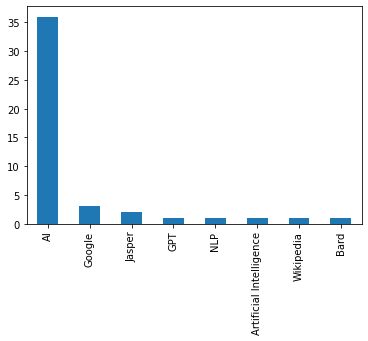

In [ ]:
# Call the entity_analyzer function above and pass in a URL

entity_analyzer('https://webfor.com/blog/working-with-ai-writing-tools/')

# **Dandelion.au**
Use Dandelion.eu semantic text analysis API for analyzing entities. Get your API key at https://dandelion.eu/ (1000 free requests/day).

In [ ]:
# Install dandelion.eu library

!pip install dandelion-eu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dandelion-eu: filename=dandelion_eu-0.3.2-py3-none-any.whl size=7391 sha256=a38ced704076ce80d1ee48c70461af69edd2e4fe1f190356e1b51e0cb47251b2
  Stored in directory: /root/.cache/pip/wheels/1b/fe/88/439e85554bec91c187d8ac0acb740851ad3cb9e63f5d18a52e
Successfully built dandelion-eu


In [ ]:
# Import libraries for script

from dandelion import DataTXT
import pandas as pd
import csv
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Add your Dandelion.eu token for the dataTXT API. Get your API key at https://dandelion.eu/ (1000 requests/day for free)

datatxt = DataTXT(token='[Enter Dandelion.eu API token]')

In [ ]:
# Create Pandas Dataframe and lists to hold entity information
df = pd.DataFrame(columns=['Entity name','Entity URI', 'Title', 'Entity confidence'])
new_values = []
new_url = []
new_types = []
new_confidence = []
new_abstract = []
new_lod = []
new_topEntities = []
new_title = []


page = requests.get("[Enter URL]")
soup = BeautifulSoup(page.content, 'html.parser')
body = soup.find('body')

content = soup.find(class_="entry-content") # Update to match the HTML class for the body or article on the URL you are trying to examine
content_text = content.get_text()
content_text_clean = content_text.replace('\n', ' ').replace('\r', '')

# Add your Dandelion.au token
datatxt = DataTXT(token='[Enter Dandelion.eu API token]')
response = datatxt.nex(content_text_clean)

def entity_analyzer_2(response):
  for annotation in response.annotations:
      print(annotation)
      print(annotation.spot)
      #df.loc[annotation, 'Entity URI'] = annotation.uri
      print(annotation.uri)
      #print(annotation.topEntities)
      new_values.append(annotation.spot)
      new_url.append(annotation.uri)
      new_title.append(annotation.title)
      new_confidence.append(annotation.confidence)


      #spaceholder += 1
  df['Entity name'] = new_values
  df['Entity URI'] = new_url
  df['Title'] = new_title
  df['Entity confidence'] = new_confidence

  counts = df['Entity name'].value_counts()
  #df = df.drop.duplicates(subset='Entity name')
  df.to_csv('Dandelion_entities.csv')

  print(counts)
  df.head()
  df['Entity name'].value_counts()[:10].plot(x='Entites', y='Number of mentions', kind='bar')
  #entities_list['entities'].value_counts().plot(kind='bar').savefig('entities.png')
  plt.savefig('entities.png')
  with open('Dandelion_entity_counter.csv', 'w', newline='') as csvfile:
      # create a csv writer object
      writer = csv.writer(csvfile)
      # write the keys and values of the counter as rows in the csv file
      writer.writerows(counts.items())

In [ ]:
# Call entity_analyzer_2 function

entity_analyzer_2(response)

In [ ]:
# Display the first 5 results of the Pandas dataframe
df.head()

,Entity name,Entity URI,Title,Entity confidence
0,Google Analytics,http://en.wikipedia.org/wiki/Google_Analytics,Google Analytics,0.8871
1,GA4,http://en.wikipedia.org/wiki/Georgia%27s_4th_c...,Georgia's 4th congressional district,0.6967
2,Google Analytics,http://en.wikipedia.org/wiki/Google_Analytics,Google Analytics,0.8863
3,GA4,http://en.wikipedia.org/wiki/Georgia%27s_4th_c...,Georgia's 4th congressional district,0.7039
4,tracking,http://en.wikipedia.org/wiki/Internet_privacy,Internet privacy,0.6257


In [ ]:
# Group entities by Entity name and count
dandelion_entities = df.groupby(['Entity name']).size().reset_index(name='counts')

dandelion_entities.head()

,Entity name,counts
0,1. Click,1
1,1st party cookie,1
2,AI,1
3,AI-based,1
4,Ad,1


In [ ]:

dandelion_entity_counts = df['Entity name'].value_counts().sort_values(ascending=False)
#dandelion_entity_counts.to_csv('dandelion_entities_all.csv')

# **TextRazor API**
Use TextRazor API to perform entity analysis on both a single URL and on all URLs ranking on page one of SERPs. Use various libraries to visualize the entities.

## **V1 - Crawl and Analyze Single URL**
Crawl a single URL and analyze the entities using TextRazor API. Get API key from https://www.textrazor.com/ (500 free requests/day)

In [ ]:
# Install textrazor and import libraries

!pip install textrazor
import textrazor
import matplotlib.pyplot as plt
import pandas as pd
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for textrazor: filename=textrazor-1.4.0-py3-none-any.whl size=17021 sha256=f496779409b4dba782bb71a4566c79cbbe7408b492908d4c2681a83c8370cc8e
  Stored in directory: /root/.cache/pip/wheels/b6/8a/2a/67d12ee4cc2a0db856950f9c4475170e74c8b8190c743438ea
Successfully built textrazor


In [ ]:
# Insert textrazor API key - get from https://www.textrazor.com/ (500 free requests/day)

textrazor.api_key = "[Enter TextRazor API Key]"

In [ ]:
# create textrazor class using textrazor.TextRazor and then call textrazor API using analyze_url

client = textrazor.TextRazor(extractors=["entities", "topics"])
response = client.analyze_url("[Enter URL to Analyze]")

In [ ]:
# Create dataframe and lists
df = pd.DataFrame(columns=['Entity ID', 'Entity Relevance', 'Entity Confidence', 'Entity Freebase'])
new_entityid = []
new_relevance = []
new_confidence = []
new_freebase = []

# Loop entities and append to list
for entity in response.entities():
    entity_id = re.sub(r'\d+', '', entity.id) # remove any numeric characters from the entity ID
    print(entity_id, entity.relevance_score, entity.confidence_score, entity.freebase_types)
    new_entityid.append(entity_id)
    new_relevance.append(entity.relevance_score)
    new_confidence.append(entity.confidence_score)
    new_freebase.append(entity.freebase_types)


# Assign columns values from lists
df['Entity ID'] = new_entityid
df['Entity Relevance'] = new_relevance
df['Entity Confidence'] = new_confidence
df['Entity Freebase'] = new_freebase

In [ ]:
# Display values in Pandas dataframe

df.to_csv('textrazor_v1_entities.csv')
df.head(25)

In [ ]:
# get the top 10 Entities by frequency
top_10_entities = df['Entity ID'].value_counts().nlargest(10)

# plot the bar chart
top_10_entities.plot(kind='bar')

# add labels and title
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.title('Top 10 Entities by frequency')

# show the plot
plt.show()

## **V2 - Crawl Page 1 SERPs**
Crawl results on Page 1 of SERPs and analyze the entities using TextRazor API. Get API key from https://www.textrazor.com/ (500 free requests/day). Use Spacy to visualize entities.

In [ ]:
#Install Advertools and Import Library to Crawl SERPs

!pip install advertools
import advertools as adv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.5 MB/s eta 0:00:00


In [ ]:
# Call serp_rankings Advertools function to Scrape Page 1 SERP Results - update query, search engine ID, and custom search API key

serp_rankings = adv.serp_goog(q=['enter keyword list separated by commas'], gl=['us'], cx='enter-search-engine-id', key='enter-api-key')

In [ ]:
# Use Pandas head to display results and save to CSV file named data.csv

serp_rankings.to_csv('data.csv')
serp_rankings.head()

In [ ]:
# Crawl results of data.csv file and extract entities from all URLs ranking on Page 1 - this can take a few minutes!

import time
from urllib.error import HTTPError
!pip install textrazor
import textrazor
import pandas as pd

new_df2 = pd.DataFrame(columns=['Entity ID', 'Entity Relevance', 'Entity Confidence', 'Entity Freebase', 'URL'])

# read the dataframe
df = pd.read_csv('data.csv')

for i, link in enumerate(df['formattedUrl']):
    try:
         # create a new dataframe for each link
      new_df = pd.DataFrame(columns=['Entity ID', 'Entity Relevance', 'Entity Confidence', 'Entity Freebase'])
      new_entityid = []
      new_relevance = []
      new_confidence = []
      new_freebase = []

      client = textrazor.TextRazor(extractors=["entities", "topics"])
      response = client.analyze_url(str(link))

      for entity in response.entities():
          new_entityid.append(entity.id)
          new_relevance.append(entity.relevance_score)
          new_confidence.append(entity.confidence_score)
          new_freebase.append(entity.freebase_types)

      # add the extracted information to the new dataframe
      new_df['Entity ID'] = new_entityid
      new_df['Entity Relevance'] = new_relevance
      new_df['Entity Confidence'] = new_confidence
      new_df['Entity Freebase'] = new_freebase
      new_df['URL'] = link

      new_df2 = pd.concat([new_df2, new_df], ignore_index=True)

      # save the new dataframe to a csv file
      #file_name = f"test_{i}.csv"
      #new_df.to_csv(file_name, index=None)
      time.sleep(5)
    except HTTPError as e:
        print(f'Error occured for link {link}, skipping. Error: {e}')
        continue


new_df2.to_csv("textrazor_v2_entities.csv", index=None)


In [ ]:
grouped = new_df2.groupby(['URL', 'Entity ID']).size().reset_index(name='counts')

grouped.head()

In [ ]:
fig = px.bar(grouped, x='URL', y='counts', color='Entity ID', title='Count of Entity Mentions by URL')
fig.update_layout(height=1000)
fig.show()

# **GPT-3 OpenAI API**
Use the GPT-3 OpenAI Api to analyze entities of URLs on page 1 of SERPs for a keyword. Generate your API key from https://openai.com/api/ (no free queries)

In [ ]:
# Install OpenAI library

!pip3 install openai==0.27.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 4.7 MB/s eta 0:00:00


In [ ]:
# Import Python Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import openai

In [ ]:
# insert OpenAI key

openai.api_key = "[INSERT OPENAI API KEY]"

def entity_analyzer_3(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  body = soup.find('body')

  crawl = soup.find(class_="entry-content")
  crawl_text = crawl.get_text()
  crawl_text_clean = crawl_text.replace('\n', ' ').replace('\r', '')

  #nlp = spacy.load('en_core_web_sm')
  #doc = nlp(crawl_text_clean)

  response = openai.ChatCompletion.create(
      model='gpt-3.5-turbo',
      n=1,
      messages=[
          {"role": "system", "content": "Perform named entity recognition using natural language processing on the content provided for SEO purposes. The ouput should include the entities that are mentioned, it should also count entities by the number of mentions per entity, a wikipedia URL for each entity with a known wikipedia URL, and finally indicate if the entity is important or not important for SEO purposes, sort the list from highest to loweest with the entity and total number of mentions"},
          {"role": "user", "content": crawl_text_clean},
      ])

  message = response.choices[0]['message']
  print("{}: {}".format(message['role'], message['content']))
  testing = response
  return testing

In [ ]:
entity_analyzer_3('https://webfor.com/blog/working-with-ai-writing-tools/')

assistant: Named Entities:
- Kyle Greenwood
- AI
- OpenAI
- Bard
- Chat GPT
- Jasper
- SEO
- Googles
- Bings
- Yahoos
- venturebeat.com
- Saturday morning cartoons
- NLP
- NLG
- Conjunction Junction
- primary and recommended keywords
- U.S. history
- Twitter
- Google
- truthiness
- alternative facts
- falsehoods
- internet
- facts
- context
- Google Bard
- SEO optimization guidelines
- Webfor
- craiyon.com

Counts:
- AI: 9
- SEO: 4
- Google: 2
- NLP: 1
- NLG: 1
- Twitter: 1

Wikipedia URLs:
- AI: https://en.wikipedia.org/wiki/Artificial_intelligence
- Google: https://en.wikipedia.org/wiki/Google
- NLP: https://en.wikipedia.org/wiki/Natural_language_processing

Important for SEO:
- AI: Important
- SEO: Important
- Google: Important

Sorted by Mention Count:
- AI: 9
- SEO: 4
- Google: 2
- NLP: 1
- NLG: 1
- Twitter: 1
- Kyle Greenwood: 1
- OpenAI: 1
- Bard: 1
- Chat GPT: 1
- Googles: 1
- Bings: 1
- Yahoos: 1
- venturebeat.com: 1
- Saturday morning cartoons: 1
- Conjunction Junction: 1
- p

<OpenAIObject chat.completion id=chatcmpl-6trvDXjFaUXa49kqc4FNX6idmuqPw at 0x7fb7b65c2860> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Named Entities:\n- Kyle Greenwood\n- AI\n- OpenAI\n- Bard\n- Chat GPT\n- Jasper\n- SEO\n- Googles\n- Bings\n- Yahoos\n- venturebeat.com\n- Saturday morning cartoons\n- NLP\n- NLG\n- Conjunction Junction\n- primary and recommended keywords\n- U.S. history\n- Twitter\n- Google\n- truthiness\n- alternative facts\n- falsehoods\n- internet\n- facts\n- context\n- Google Bard\n- SEO optimization guidelines\n- Webfor\n- craiyon.com\n\nCounts:\n- AI: 9\n- SEO: 4\n- Google: 2\n- NLP: 1\n- NLG: 1\n- Twitter: 1\n\nWikipedia URLs:\n- AI: https://en.wikipedia.org/wiki/Artificial_intelligence\n- Google: https://en.wikipedia.org/wiki/Google\n- NLP: https://en.wikipedia.org/wiki/Natural_language_processing\n\nImportant for SEO:\n- AI: Important\n- SEO: Important\n- Google: Important\n\nSorted by Me